# PALO-IT-TECH-ASSIGNMENT
<br>
<img src="https://cdn.techinasia.com/data/images/9d3c9dd6f02bef2766585e963a0b2d57.png" width="350px" length="350px"/>

<a class="anchor" id="0.1"></a>


# Outline

1. [Introduction ](#1)
2. [Data](#2)
    - [2.1 Data cleaning](#2.1)
    - [2.2 Data Exploration](#2.2)
    - [2.3 Create Dummy variables](#2.3)
3. [Models](#3)
    - [3.1 DIY Logistic Regression](#3.1)
    - [3.2 Sklearn Logistic Regression](#3.2)
    - [3.3 K-Nearest Neighbour](#3.3)
    - [3.4 Support Vector Machine](#3.4)
    - [3.5 Naive Bayes Algorithm](#3.5)
    - [3.6 Decision Tree](#3.6)
    - [3.7 Random Forest](#3.7)
    - [3.8 XGBoost](#3.8)
    - [3.9 LightGBM](#3.9)  
    - [3.10 Comparing Models](#3.10)
         - [3.10.1 Confusion Matrix](#3.10.1)
         - [3.10.2 ROC CURVE](#3.10.2)  
4. [Analysis](#4)
    - [4.1 Check learning curve](#4.1)
    - [4.2 Feature importance](#4.2)
    - [4.3 PDP](#4.3)
    - [4.4 Cross validation ](#4.4)

5. [Could we improve the performance?](#5)
    - [5.1 : Label Smoothing](#5.1)
    - [5.2 : Grid Search](#5.2)
    - [5.3 : Feature Augmentation](#5.3)
    - [5.4 : Feature Selection via VarianceThreshold](#5.4)
    - [5.5 : Feature Selection via chi2](#5.5)  
6. [Conclusion](#6)

# 1. Introduction <a class="anchor" id="1"></a>
<br>
Let's evaluate whether you have a heart disease or not!

We will first check the data, then train some common models to see what we can learn from the dataset.
<br>
After we acquired the feature information via models, we will try to evaluate the dataset in several ways.
<br>
The last thing we will do is to try some strategies to improve the performance.

**First of all, import some essential libraries.**

In [1]:
import math
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import os
print(os.listdir("../input"))


/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since 

['palo-it-tech']


# 2. Data <a class="anchor" id="2"></a>

The data set is base on [here](https://www.kaggle.com/ronitf/heart-disease-uci)

In [2]:
# Read our data
df = pd.read_csv("../input/palo-it-tech/PALO_IT_heart.csv")

In [3]:
# Our data
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,47,male,0,112,204.0,FALSE,1,143,0.0,0.1,2,0,fixed defect,TRUE
1,57,male,0,165,289.0,TRUE,0,124,0.0,1.0,1,3,reversable defect,FALSE
2,61,female,0,130,330.0,FALSE,0,169,0.0,0.0,2,0,fixed defect,FALSE
3,52,female,2,136,196.0,FALSE,0,169,0.0,0.1,1,0,fixed defect,TRUE
4,70,male,1,156,245.0,FALSE,0,143,0.0,0.0,2,0,fixed defect,TRUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,63,female,1,140,195.0,FALSE,1,179,0.0,0.0,2,2,fixed defect,TRUE
323,51,female,0,130,305.0,FALSE,1,142,1.0,1.2,1,0,reversable defect,FALSE
324,59,female,0,174,249.0,FALSE,1,143,1.0,0.0,1,0,fixed defect,FALSE
325,67,male,0,120,237.0,FALSE,1,71,0.0,1.0,1,0,fixed defect,FALSE


Data contains; <br>

* age - age in years <br>
* sex - (1 = male; 0 = female) <br>
* cp - chest pain type <br>
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) <br>
* chol - serum cholestoral in mg/dl <br>
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) <br>
* restecg - resting electrocardiographic results <br>
* thalach - maximum heart rate achieved <br>
* exang - exercise induced angina (1 = yes; 0 = no) <br>
* oldpeak - ST depression induced by exercise relative to rest <br>
* slope - the slope of the peak exercise ST segment <br>
* ca - number of major vessels (0-3) colored by flourosopy <br>
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect <br>
* target - have disease or not (1=yes, 0=no)

****DATA DIMENSION
We have 327 data, each have 14 dimensions.

In [4]:
print("The numbers of data is " + str(df.shape[0]))
print("Each data has " + str(df.shape[1]) + " dimensions")


The numbers of data is 327
Each data has 14 dimensions


## 2.1 Data cleaning <a class="anchor" id="2.1"></a>

We delete the dirty data and tranfer data into proper formats.

In [5]:
def clean(i, df, count):
    
    #age
    if type(df.at[i, 'age']) == str and not df.at[i, 'age'].isdigit:
        df = df.drop([i])
        return df, count
    if type(df.at[i, 'age']) == float and math.isnan(df.at[i, 'age']):
        df = df.drop([i])
        return df, count

    #sex:
    if df.at[i, 'sex'] == "female":
        df.at[i, 'sex'] = 0
    elif df.at[i, 'sex'] == "male":
        df.at[i, 'sex'] = 1
    else:
        df = df.drop([i])
        return df, count


    #cp:
    if type(df.at[i, 'cp']) == str and not df.at[i, 'cp'].isdigit:
        df = df.drop([i])
        return df, count


    #trestbps:
    if type(df.at[i, 'trestbps']) == str and not df.at[i, 'trestbps'].isdigit:
        df = df.drop([i])
        return df, count


    #chol:
    if type(int(df.at[i, 'chol'])) != int:
        df = df.drop([i])
        return df, count

        
    #fbs:    
    if df.at[i, 'fbs'] == "FALSE":
        df.at[i, 'fbs'] = 0
    elif df.at[i, 'fbs'] == "TRUE":
        df.at[i, 'fbs'] = 1
    else:
        df = df.drop([i])
        return df, count

        
    #restecg:
    if type(int(df.at[i, 'restecg'])) != int:
        df = df.drop([i])
        return df, count


    #thalach:
    if type(int(df.at[i, 'thalach'])) != int:
        df = df.drop([i])
        return df, count

    #exang:
    if type(int(df.at[i, 'exang'])) != int:
        df = df.drop([i])   
        return df, count


    #oldpeak:
    if type(int(df.at[i, 'oldpeak'])) != int or type(float(df.at[i, 'oldpeak'])) != float:
        df = df.drop([i])
        return df, count


    #slope:
    if type(int(df.at[i, 'slope'])) != int:
        df = df.drop([i])
        return df, count


    #ca:
    if type(int(df.at[i, 'ca'])) != int:
        df = df.drop([i])
        return df, count


    #thal:
    if df.at[i, 'thal'] == "normal":
        df.at[i, 'thal'] = 1
    elif df.at[i, 'thal'] == "fixed defect":
        df.at[i, 'thal'] = 2
    elif df.at[i, 'thal'] == "reversable defect":
        df.at[i, 'thal'] = 3
    else:
        df = df.drop([i])
        return df, count


    #target:
    if df.at[i, 'target'] == "FALSE":
        df.at[i, 'target'] = 0
    elif df.at[i, 'target'] == "TRUE":
        df.at[i, 'target'] = 1
    else:
        df = df.drop([i])
    
    count -= 1 
    return df, count

        
        
        

Delete the dirty data.

In [6]:
count = 0
for index in range(df.shape[0]):
    ori_count = count
    df, count = clean(index, df, count)
    if ori_count == count:
        print("DATA " + "{:>3d}".format(index) + " has been deleted.")
    count += 1

print()
print("Total deleted data : " + str(count))


DATA   8 has been deleted.
DATA  36 has been deleted.
DATA  40 has been deleted.
DATA  72 has been deleted.
DATA  73 has been deleted.
DATA 122 has been deleted.
DATA 166 has been deleted.
DATA 173 has been deleted.
DATA 204 has been deleted.
DATA 231 has been deleted.
DATA 256 has been deleted.
DATA 305 has been deleted.
DATA 313 has been deleted.
DATA 318 has been deleted.

Total deleted data : 14


**Convert data into float in order to do data engineering and feed into models**

In [7]:
df= df.astype(float)

## 2.2 Data Exploration <a class="anchor" id="2.2"></a>

Let's check our feature.

I list some of features to check whether they affects the target or not.

Let's check our target distribution first.

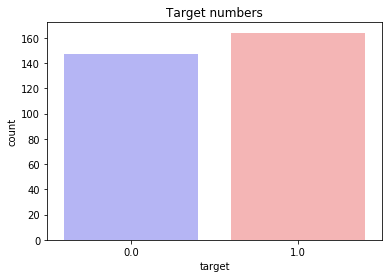

1.0    164
0.0    147
Name: target, dtype: int64
Percentage of Patients don't have Heart Disease: 47.27%
Percentage of Patients have Heart Disease: 52.73%


In [8]:
sns.countplot(x="target", data=df, palette="bwr").set_title('Target numbers')
plt.show()
print(df.target.value_counts())
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients don't have Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

The dataset is quiet balanced.

Feature : How about sex? 

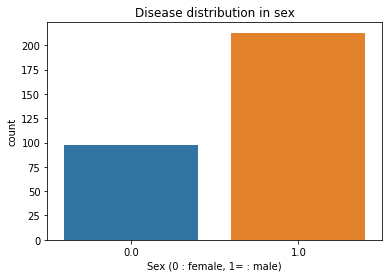

Percentage of Female Patients: 31.51%
Percentage of Male Patients: 68.49%


In [9]:
sns.countplot(x='sex', data=df).set_title('Disease distribution in sex')
plt.xlabel("Sex (0 : female, 1= : male)")
plt.show()
countFemale = len(df[df.sex == 0])
countMale   = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

It seems like Male has relatively high chance having a heart disease.

Next, let's check sex and age together.

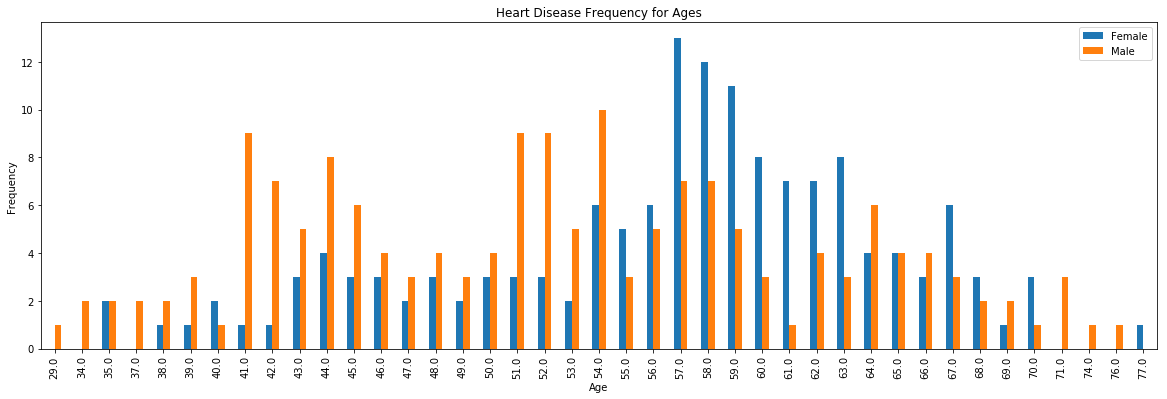

In [10]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.legend(["Female", "Male"])
plt.show()

Age 57~63 has high probabilities for Female to get a heart disease.

For both male and female, age 41~63 has higher chance to have a heart disease.

Let's consider age and Max heart rate.

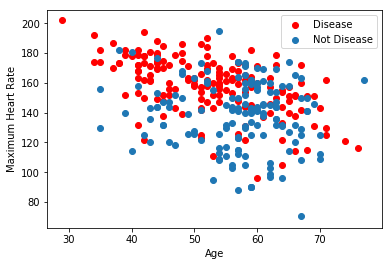

In [11]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

It seems like the lower the Max heart rate, the lower chance we migh have a heart disease.

This diagram also indicates that for both male and female, age 41~63 has higher chance to have a heart disease.

Let's check another feature : Slope of the peak exercise ST segment

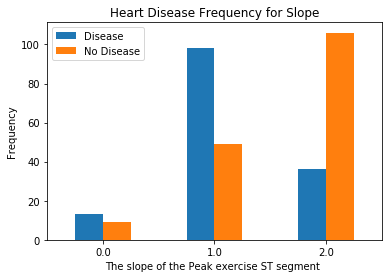

In [12]:
pd.crosstab(df.slope,df.target).plot(kind="bar")
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The slope of the Peak exercise ST segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.legend(["Disease", "No Disease"])
plt.show()

It seems like The Peak Exercise ST Segment type 1 and 2 can indicate whether you have disease.

Let's check Fast blood sugar.

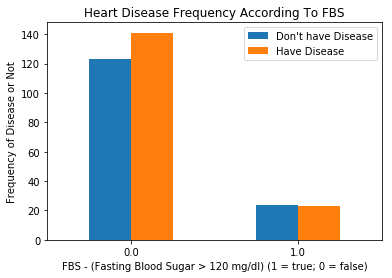

In [13]:
pd.crosstab(df.fbs,df.target).plot(kind="bar")
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.legend(["Don't have Disease", "Have Disease"])
plt.show()

It seems like FBS is not a key factor.

Let's check Chest pain type.

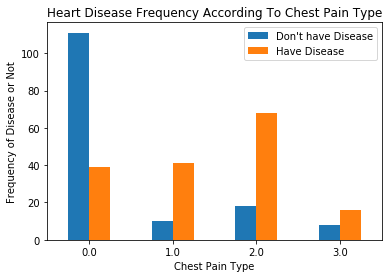

In [14]:
pd.crosstab(df.cp,df.target).plot(kind="bar")
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.legend(["Don't have Disease", "Have Disease"])
plt.show()

It seems like chest pain type can be a good factor, especially type 0.

## 2.3 Creating Dummy Variables <a class="anchor" id="2.3"></a>

Since 'cp', 'thal', 'slope' and 'ca' are categorical variables we'll turn them into dummy variables.
(Dummies => e.g. January is 1, February is 2, But does February > January. It doesn't make sense. ==> Need Dummies)

In [15]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")
d = pd.get_dummies(df['ca'], prefix = "ca")

In [16]:
frames = [df, a, b, c, d]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal_2.0,thal_3.0,slope_0.0,slope_1.0,slope_2.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,ca_4.0
0,47.0,1.0,0.0,112.0,204.0,0.0,1.0,143.0,0.0,0.1,...,1,0,0,0,1,1,0,0,0,0
1,57.0,1.0,0.0,165.0,289.0,1.0,0.0,124.0,0.0,1.0,...,0,1,0,1,0,0,0,0,1,0
2,61.0,0.0,0.0,130.0,330.0,0.0,0.0,169.0,0.0,0.0,...,1,0,0,0,1,1,0,0,0,0
3,52.0,0.0,2.0,136.0,196.0,0.0,0.0,169.0,0.0,0.1,...,1,0,0,1,0,1,0,0,0,0
4,70.0,1.0,1.0,156.0,245.0,0.0,0.0,143.0,0.0,0.0,...,1,0,0,0,1,1,0,0,0,0


Delete the original cp, thal, ca and slope.

In [17]:
df = df.drop(columns = ['cp', 'thal', 'slope', 'ca'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target,...,thal_2.0,thal_3.0,slope_0.0,slope_1.0,slope_2.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,ca_4.0
0,47.0,1.0,112.0,204.0,0.0,1.0,143.0,0.0,0.1,1.0,...,1,0,0,0,1,1,0,0,0,0
1,57.0,1.0,165.0,289.0,1.0,0.0,124.0,0.0,1.0,0.0,...,0,1,0,1,0,0,0,0,1,0
2,61.0,0.0,130.0,330.0,0.0,0.0,169.0,0.0,0.0,0.0,...,1,0,0,0,1,1,0,0,0,0
3,52.0,0.0,136.0,196.0,0.0,0.0,169.0,0.0,0.1,1.0,...,1,0,0,1,0,1,0,0,0,0
4,70.0,1.0,156.0,245.0,0.0,0.0,143.0,0.0,0.0,1.0,...,1,0,0,0,1,1,0,0,0,0


# 3. Models <a class="anchor" id="3"></a>

## 3.1 DIY Logistic Regression <a class="anchor" id="3.1"></a>
<br>


In [18]:
# Store original df for later feature engineering
df_ori = df

In [19]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

### Normalize Data
<br>
We need to normalize data in order to make it converge faster and more stable.
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSYLcQX5hZ9vEqopFv-MyxaBeelXpnEY7T9XHOk7FTqEbzumMA-&s" width="200px"/>

In [20]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

We will split our data. 80% of our data will be train data and 20% of it will be test data.

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=0)

#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test  = x_test.T
y_test  = y_test.T

print(x_train.shape)

(24, 248)


Let's say weight = 0.01 and bias = 0.0

In [22]:
#initialize
def initialize(dimension):
    
    weight = np.full((dimension,1),0.01)
    bias   = 0.0
    return weight,bias

### Cost Function
<br>
<img src="https://miro.medium.com/max/1192/1*wilGXrItaMAJmZNl6RJq9Q.png" width="500px"/>

In [23]:
def sigmoid(x):
    return 1. / (1. + np.exp(-x))

In [24]:
def forwardBackward(weight,bias,x_train,y_train):
    # Forward
    
    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss   = -(y_train * np.log(y_head) + (1-y_train) * np.log(1 - y_head))
    cost   = np.sum(loss) / x_train.shape[1]
    
    # Backward
    derivative_weight = np.dot(x_train, ((y_head - y_train).T)) / x_train.shape[1]
    derivative_bias   = np.sum( y_head-y_train) / x_train.shape[1]
    gradients         = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost,gradients

In [25]:
def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    
    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost, gradients = forwardBackward(weight,bias,x_train,y_train)
        weight          = weight - learningRate * gradients["Derivative Weight"]
        bias            = bias   - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

In [26]:
def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [27]:
def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension   = x_train.shape[0]
    weight,bias = initialize(dimension)
    
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    
    print("Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))

iteration: 100
cost: 0.30853771311100786


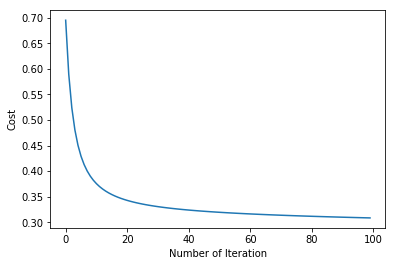

Test Accuracy: 82.54%


In [28]:
logistic_regression(x_train,y_train,x_test,y_test,1,100)

Let's build some popular models via sklearn.

## 3.2 Sklearn Logistic Regression <a class="anchor" id="3.2"></a>

In [29]:
accuracies_train = {}
accuracies_test = {}

lr = LogisticRegression(max_iter=100)
lr.fit(x_train.T,y_train.T)

acc_train = lr.score(x_train.T,y_train.T)*100
acc_test = lr.score(x_test.T,y_test.T)*100

accuracies_train['Logistic Reg'] = acc_train
accuracies_test['Logistic Reg'] = acc_test
print("Train Accuracy {:.2f}%".format(acc_train))
print("Test Accuracy {:.2f}%".format(acc_test))

Train Accuracy 87.90%
Test Accuracy 80.95%


## 3.3 K-Nearest Neighbour <a class="anchor" id="3.3"></a>
<br>
Let's use KNN algorithm.

<br>
<img src="https://machine-learning-course.readthedocs.io/en/latest/_images/knn.png" width="300px"/>

In [30]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Train Accuracy: {:.2f}%".format(2, knn.score(x_train.T, y_train.T)*100))
print("{} NN Test Accuracy: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 NN Train Accuracy: 90.73%
2 NN Test Accuracy: 76.19%


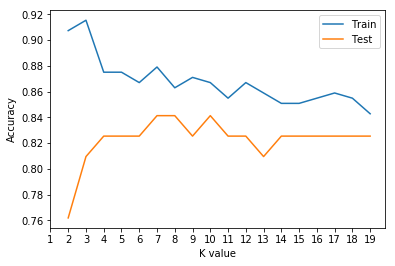

Maximum KNN Accuracy is 84.13%


In [31]:
# Find best k value
scoreList_train = []
scoreList_test = []
n_max = 20
for i in range(2,n_max):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList_train.append(knn2.score(x_train.T, y_train.T))
    scoreList_test.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(2,n_max), scoreList_train)
plt.plot(range(2,n_max), scoreList_test)
plt.xticks(np.arange(1,n_max,1))
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.legend(["Train", "Test"])
plt.show()

acc_train = max(scoreList_train)*100
acc_test = max(scoreList_test)*100
accuracies_train['KNN'] = acc_train
accuracies_test['KNN'] = acc_test

print("Maximum KNN Accuracy is {:.2f}%".format(acc_test))

## 3.4 Support Vector Machine <a class="anchor" id="3.4"></a>
Now we will use SVM algorithm. 

**Support Vector Machine Algorithm**
<br>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/450px-SVM_margin.png" width="300px"/><br>


In [32]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state = 1, probability = True, max_iter = 100)
svm.fit(x_train.T, y_train.T)

acc_train = svm.score(x_train.T,y_train.T)*100
acc_test  = svm.score(x_test.T,y_test.T)*100

accuracies_train['SVM'] = acc_train
accuracies_test['SVM']  = acc_test
print("Train Accuracy of SVM Algorithm: {:.2f}%".format(acc_train))
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc_test))

Train Accuracy of SVM Algorithm: 91.13%
Test Accuracy of SVM Algorithm: 82.54%


/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


## 3.5 Naive Bayes Algorithm <a class="anchor" id="3.5"></a>

**Naive Bayes Algorithm**
<br>
<img src="https://s3.ap-south-1.amazonaws.com/techleer/204.png" width="300px"/>

In [33]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

acc_train = nb.score(x_train.T, y_train.T) * 100
acc_test  = nb.score(x_test.T, y_test.T)   * 100

accuracies_train['Naive Bayes'] = acc_train
accuracies_test['Naive Bayes']  = acc_test

print("Train Accuracy of Naive Bayes: {:.2f}%".format(acc_train))
print("Test Accuracy of Naive Bayes: {:.2f}%".format(acc_test))

Train Accuracy of Naive Bayes: 84.68%
Test Accuracy of Naive Bayes: 84.13%


## 3.6 Decision Tree <a class="anchor" id="3.6"></a>

**Decision Tree Algorithm**
<br>
<img src="https://upload.wikimedia.org/wikipedia/commons/f/ff/Decision_tree_model.png" width="300px"/>

In [34]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth = 3)
dtc.fit(x_train.T, y_train.T)

acc_train = dtc.score(x_train.T, y_train.T) * 100
acc_test  = dtc.score(x_test.T, y_test.T)    * 100

accuracies_train['Decision Tree'] = acc_train
accuracies_test['Decision Tree']  = acc_test

print("Decision Tree Test Accuracy {:.2f}%".format(acc_train))
print("Decision Tree Test Accuracy {:.2f}%".format(acc_test))

Decision Tree Test Accuracy 85.48%
Decision Tree Test Accuracy 79.37%


## 3.7 Random Forest<a class="anchor" id="3.7"></a>

<br>
<img src="https://upload.wikimedia.org/wikipedia/commons/7/76/Random_forest_diagram_complete.png" width="300px"/>

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth = 5 ,n_estimators = 50, random_state = 1)
rf.fit(x_train.T, y_train.T)

acc_train = rf.score(x_train.T,y_train.T) * 100
acc_test  = rf.score(x_test.T,y_test.T) * 100

accuracies_train['Random Forest'] = acc_train
accuracies_test['Random Forest']  = acc_test

print("Random Forest Algorithm Train Accuracy Score : {:.2f}%".format(acc_train))
print("Random Forest Algorithm Test Accuracy Score : {:.2f}%".format(acc_test))

Random Forest Algorithm Train Accuracy Score : 91.13%
Random Forest Algorithm Test Accuracy Score : 84.13%


## 3.8 XGBoost <a class="anchor" id="3.8"></a>

In [36]:
# applying XGBoost

from xgboost import XGBClassifier

param_dist = {'n_estimators': 10,
              'learning_rate': 0.05}

xg = XGBClassifier(**param_dist)

# Trian
xg.fit(x_train.T, y_train.T)

# Prediction
y_pred_train = xg.predict(x_train.T)
y_pred       = xg.predict(x_test.T)

from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_train.T, y_pred_train.T) * 100
acc_test  = accuracy_score(y_test.T, y_pred.T) * 100

accuracies_train['XGBoost'] = acc_train
accuracies_test['XGBoost']  = acc_test

print("XGBoost Train Accuracy Score : {:.2f}%".format(acc_train))
print("XGBoost Test Accuracy Score : {:.2f}%".format(acc_test))


XGBoost Train Accuracy Score : 91.94%
XGBoost Test Accuracy Score : 88.89%


## 3.9 LightGBM <a class="anchor" id="3.9"></a>

In [37]:
import lightgbm as lgb

params = {'learning_rate':0.1,
          'n_estimators': 10}

LGB = lgb.LGBMClassifier(**params)

# Trian
model = LGB.fit(x_train.T, y_train.T )

# Prediction
y_pred_train = LGB.predict(x_train.T)
y_pred = LGB.predict(x_test.T)

acc_train = accuracy_score(y_train.T, y_pred_train.T) * 100
acc_test = accuracy_score(y_test.T, y_pred.T) * 100

accuracies_train['LightGBM'] = acc_train
accuracies_test['LightGBM'] = acc_test

print("LightGBM Train Accuracy Score : {:.2f}%".format(acc_train))
print("LightGBM Test Accuracy Score : {:.2f}%".format(acc_test))

LightGBM Train Accuracy Score : 87.10%
LightGBM Test Accuracy Score : 87.30%


## 3.10 Comparing Models <a class="anchor" id="3.10"></a>
> Check Accuracy

In [38]:
Total_accuracy = pd.DataFrame([accuracies_train,accuracies_test] , index=['Train', 'Test'])
print(Total_accuracy)

       Logistic Reg        KNN        SVM  Naive Bayes  Decision Tree  \
Train     87.903226  91.532258  91.129032    84.677419      85.483871   
Test      80.952381  84.126984  82.539683    84.126984      79.365079   

       Random Forest    XGBoost   LightGBM  
Train      91.129032  91.935484  87.096774  
Test       84.126984  88.888889  87.301587  


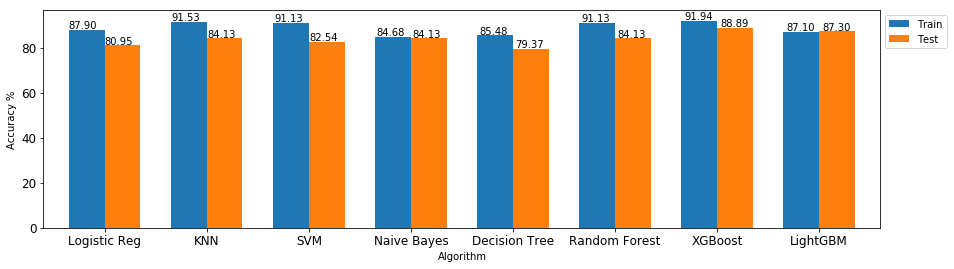

In [39]:
acc_diagram = Total_accuracy.T
ax = acc_diagram.plot(kind='bar', legend=["Train", "Test"], figsize =[15, 4], fontsize =12, width=0.7, rot=0)
ax.get_legend().set_bbox_to_anchor((1, 1))
ax.set_xlabel("Algorithm")
ax.set_ylabel("Accuracy %")
for p in ax.patches:
    ax.annotate("%.2f" % (p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    
plt.show()


**Summary**

**The results are quite good without too much parameter tuning.**

### 3.10.1 Confusion Matrix <a class="anchor" id="3.10.1"></a>

In [40]:
# Predicted values

knn11 = KNeighborsClassifier(n_neighbors = 11)
knn11.fit(x_train.T, y_train.T)

y_head_lr       = lr.predict(x_test.T)
y_head_knn      = knn11.predict(x_test.T)
y_head_svm      = svm.predict(x_test.T)
y_head_nb       = nb.predict(x_test.T)
y_head_dtc      = dtc.predict(x_test.T)
y_head_rf       = rf.predict(x_test.T)
y_head_xgboost  = xg.predict(x_test.T)
y_head_lightgbm = LGB.predict(x_test.T)


In [41]:
ALL_MODEL = {'lr':lr, 'knn11':knn11, 'svm':svm, 'nb':nb, 'dtc':dtc, 'rf':rf, 'LightGBM':LGB, "XGBoost":xg}

In [42]:
from sklearn.metrics import confusion_matrix

cm_lr       = confusion_matrix(y_test,y_head_lr)
cm_knn      = confusion_matrix(y_test,y_head_knn)
cm_svm      = confusion_matrix(y_test,y_head_svm)
cm_nb       = confusion_matrix(y_test,y_head_nb)
cm_dtc      = confusion_matrix(y_test,y_head_dtc)
cm_rf       = confusion_matrix(y_test,y_head_rf)
cm_xgboost  = confusion_matrix(y_test,y_head_xgboost)
cm_lightgbm = confusion_matrix(y_test,y_head_lightgbm)




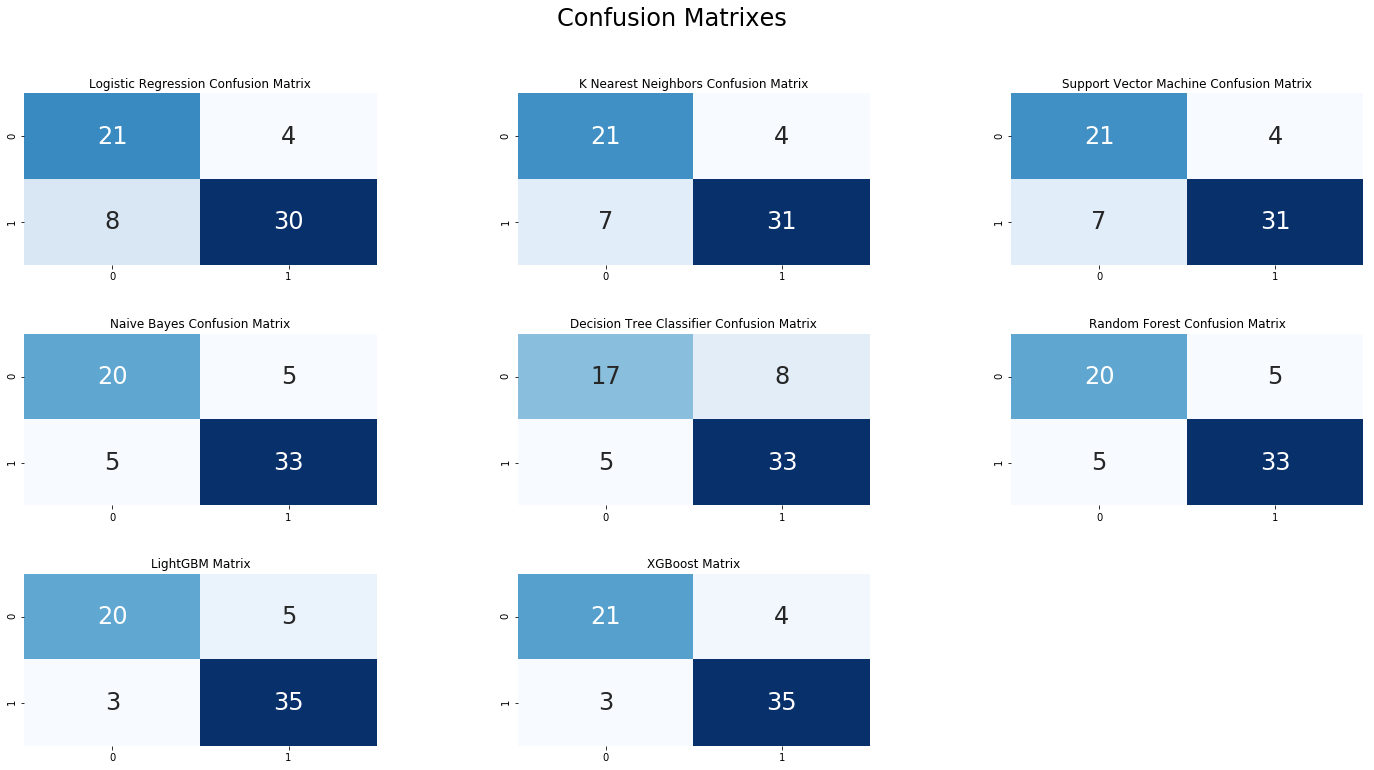

In [43]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(3,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,7)
plt.title("LightGBM Matrix")
sns.heatmap(cm_lightgbm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,8)
plt.title("XGBoost Matrix")
sns.heatmap(cm_xgboost,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

It tells that FN (false negative) and FP (false positive) are pretty low.
Great!

### 3.10.2 ROC CURVE <a class="anchor" id="3.10.2"></a>

Let's check ROC and AUC.

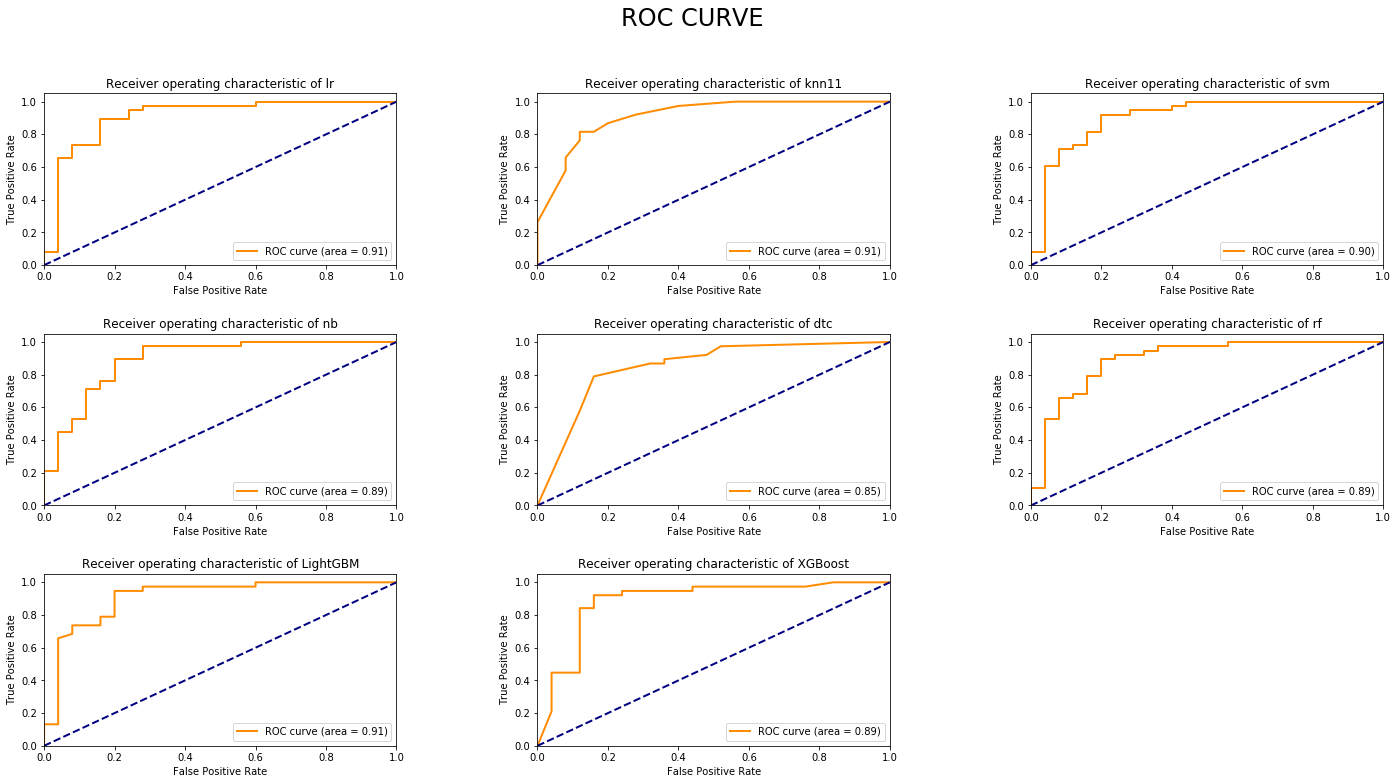

In [44]:
from sklearn import metrics

# Set up for store [name, acc, p, r, f1, auc]
df_result = pd.DataFrame(columns=('Model', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'AUC'))
row = 0

# Set up for ROC figure
plt.figure(figsize=(24,12))
plt.suptitle("ROC CURVE",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

for name, clf in ALL_MODEL.items():
    y_test_pred = clf.predict(x_test.T)

    acc = metrics.accuracy_score(y_test, y_test_pred)
    p   = metrics.precision_score(y_test, y_test_pred)
    r   = metrics.recall_score(y_test, y_test_pred)
    f1  = metrics.f1_score(y_test, y_test_pred)

    y_test_proba = clf.predict_proba(x_test.T)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_proba[:, 1])
    auc = metrics.auc(fpr, tpr)

    df_result.loc[row] = [name, acc, p, r, f1, auc]
    
    row += 1     
    
    plt.subplot(3,3,row)
    plt.title(name)
    
    #Plot curve
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
    
    # diagonal
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    
    # Figure limitation
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic of '+name)
    plt.legend(loc="lower right")

plt.show()

In general, refer to [Receiver Operating Characteristic Curve in Diagnostic Test Assessment](https://www.sciencedirect.com/science/article/pii/S1556086415306043)
<br>
An AUC of 0.5 suggests nodiscrimination (i.e.,ability to diagnose patients with and without the disease based on the test),
<br>
          0.7 to 0.8 is consid-ered acceptable
<br>
          0.8 to 0.9 is considered excellent
<br>
more than 0.9 is considered outstanding

**So => Except dtc (decision tree) is relatively low in AUC, other models have great performance!**

# 4. Analysis <a class="anchor" id="4"></a>

**We take lightGBM as our model to analyze the features and datasets**

1. **Check learning curve**  
> => Overfitting or Underfitting ?
2. **Feature importance**    
> => Which feature is more crucial ?
3. **Cross validation**       
> => Our training dataset is balanced? 

## 4.1 Check learning curve <a class="anchor" id="4.1"></a>
> => Overfitting or Underfitting ?

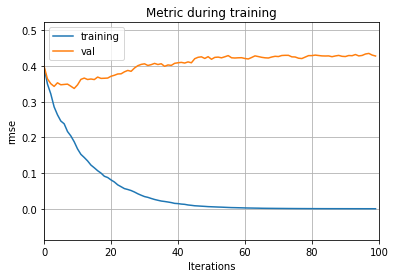

LightGBM Train Accuracy Score : 100.00%
LightGBM Test Accuracy Score : 79.37%


In [45]:
# applying lightGBM
import lightgbm as lgb


params = {'learning_rate':0.5,
          'n_estimators': 100,
          'metric': ['logloss']}

LGB_100 = lgb.LGBMClassifier(**params)

model_100 = LGB_100.fit(x_train.T, y_train.T, eval_set = [(x_train.T, y_train.T), (x_test.T, y_test.T)], eval_names = ['training', 'val'] ,eval_metric= 'rmse', verbose = False)

lgb.plot_metric(model_100, 'rmse')
plt.show();


#Prediction
y_pred_train = LGB_100.predict(x_train.T)
y_pred       = LGB_100.predict(x_test.T)

acc_train = accuracy_score(y_train.T, y_pred_train.T) * 100
acc_test  = accuracy_score(y_test.T, y_pred.T) * 100

accuracies_train['LightGBM'] = acc_train
accuracies_test['LightGBM'] = acc_test

print("LightGBM Train Accuracy Score : {:.2f}%".format(acc_train))
print("LightGBM Test Accuracy Score : {:.2f}%".format(acc_test))

It overfits after approximately n = 10.

Let's set n = 10

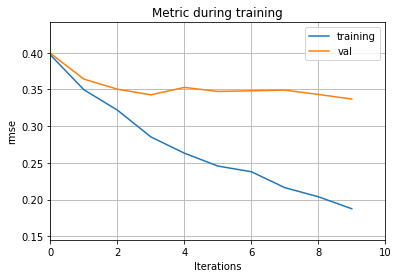

LightGBM Train Accuracy Score : 96.77%
LightGBM Test Accuracy Score : 87.30%


In [46]:
params = {'learning_rate':0.5,
          'n_estimators': 10,
          'metric': ['logloss']}

LGB_10 = lgb.LGBMClassifier(**params)

model_10 = LGB_10.fit(x_train.T, y_train.T, eval_set = [(x_train.T, y_train.T), (x_test.T, y_test.T)], eval_names = ['training', 'val'] ,eval_metric= 'rmse', verbose = False)

lgb.plot_metric(model_10, 'rmse')
plt.show();

#Prediction
y_pred = LGB_10.predict(x_test.T)

y_pred_train = LGB_10.predict(x_train.T)

from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_train.T, y_pred_train.T) * 100
acc_test = accuracy_score(y_test.T, y_pred.T) * 100

accuracies_train['LightGBM'] = acc_train
accuracies_test['LightGBM'] = acc_test

print("LightGBM Train Accuracy Score : {:.2f}%".format(acc_train))
print("LightGBM Test Accuracy Score : {:.2f}%".format(acc_test))

It's better!

## 4.2 Feature importance <a class="anchor" id="4.2"></a>
> => Which feature is more crucial ?


We plot out the feature importance and SHAP diagram of the last model.

There is a big difference between both importance measures: 

> Permutation feature importance is based on the decrease in model performance. 

> SHAP is based on magnitude of feature attributions.

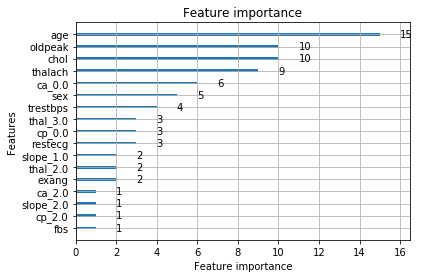

Setting feature_perturbation = "tree_path_dependent" because no background data was given.
LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


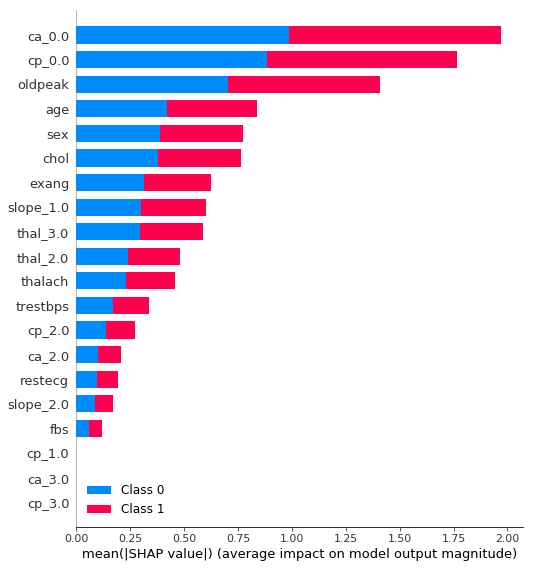

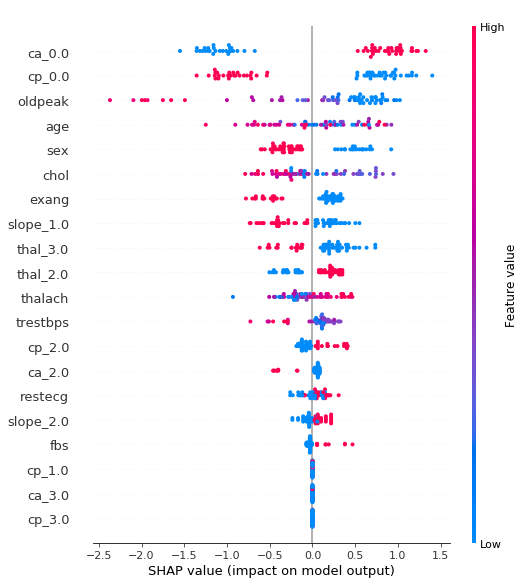

In [47]:
# Plot importance
lgb.plot_importance(model_10)
plt.show();

import shap #for SHAP values

explainer = shap.TreeExplainer(model_10)
shap_values = explainer.shap_values(x_test.T)

# Display SHAP in bar
shap.summary_plot(shap_values, x_test.T, plot_type="bar")

# Display SHAP
shap.summary_plot(shap_values[1], x_test.T)

(yes = red = good, no = blue = bad)

Via SHAP and importance 
> it seems like ca (number of major vessels) and cp_0.0 (chest pain type 0) are great factors to determine the result.

## 4.3 PDP <a class="anchor" id="4.3"></a>
Let's use [PDP](https://www.kaggle.com/dansbecker/partial-plots) to check how features affect the result as well. 

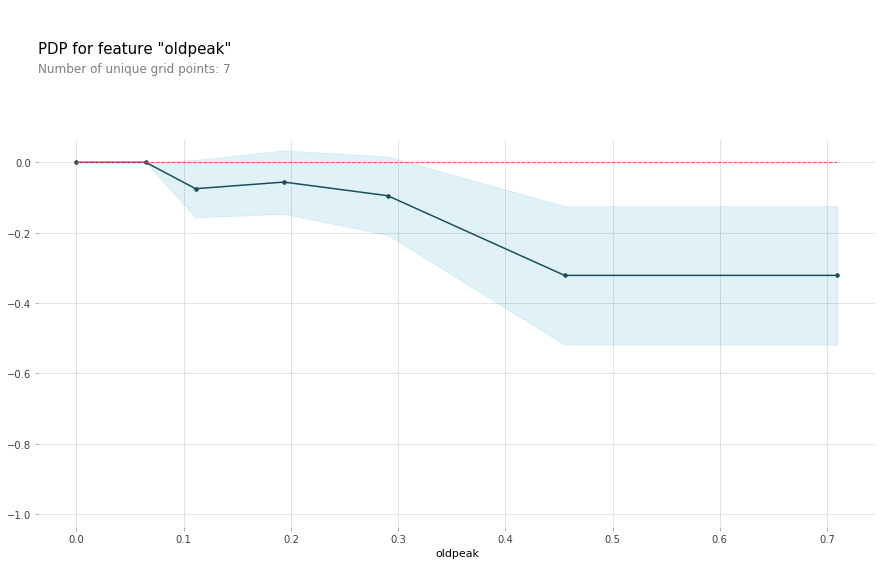

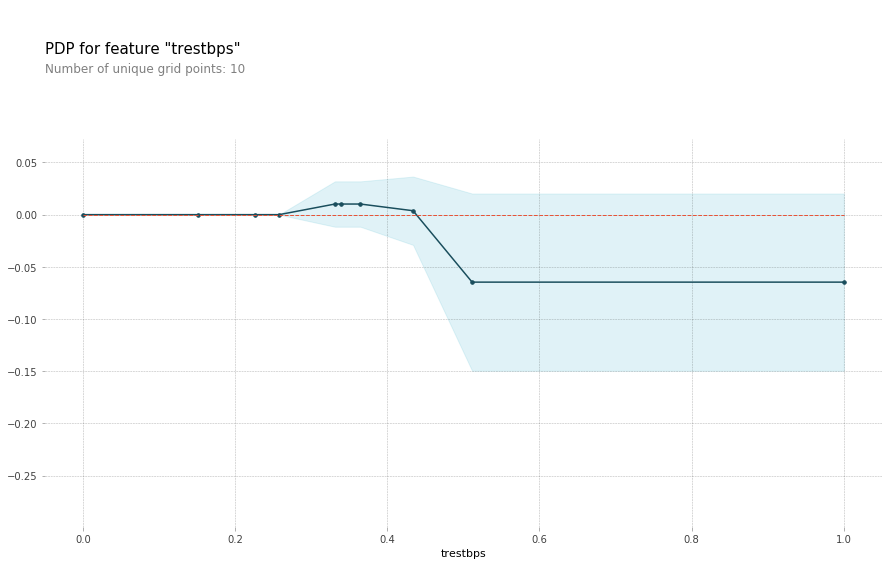

In [48]:
from pdpbox import pdp, info_plots #for partial plots

base_features = df.columns.values.tolist()
base_features.remove('target')

feat_name = 'oldpeak'
pdp_dist = pdp.pdp_isolate(model=model_10, dataset=x_test.T, model_features=base_features, feature=feat_name)
pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

feat_name = 'trestbps'
pdp_dist = pdp.pdp_isolate(model=model_10, dataset=x_test.T, model_features=base_features, feature=feat_name)
pdp.pdp_plot(pdp_dist, feat_name)
plt.show()


Via PDP, we can say
> As the number of old peak increases, it affects more in the target determine, which disease probability decreases.

> As the number of trestbps increases, it still stays around 0. (trestbps => resting blood pressure)

**Feature importance summary**

We can say "oldpeak", "cp_0.0", ca_0.0 are important factors.  (It performs critical in SHAP, PDP and importance)



## 4.4 Cross validation <a class="anchor" id="4.4"></a>

> => Our training dataset is balanced? 

** Function "plot_learning_curve" This is used for ploting the figure of Cross-validation**

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure(figsize=(10,6))  # Resize
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

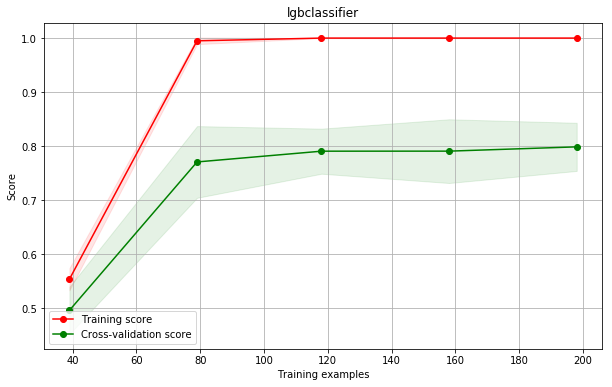

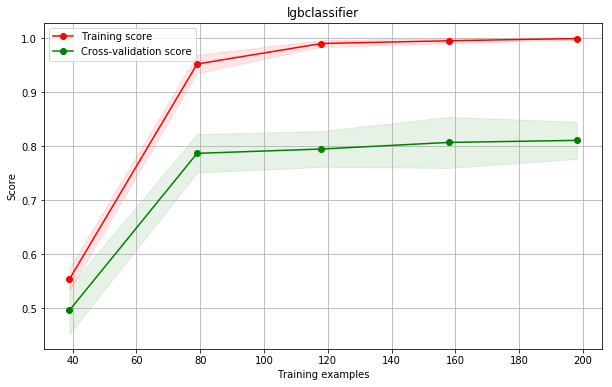

In [50]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold,StratifiedKFold

lgbr = LGBMClassifier(learning_rate = 0.2)
cv = KFold(n_splits=5, random_state=2, shuffle=True)
estimator = lgbr

plot_learning_curve(estimator, "lgbclassifier", x_train.T, y_train.T, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))    


lgbr = LGBMClassifier(learning_rate = 0.1)
estimator = lgbr
plot_learning_curve(estimator, "lgbclassifier", x_train.T, y_train.T, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))   


**Cross-validation Summary**:

If the green line starts to decline while red line raises up, it means it overfits.

But since the green line grow with the red line, we could say the dataset is quiet reliable. (Distribution is fine) 

We could not evaluate our model base on the dataset.

# 5. Could we improve the performance? <a class="anchor" id="5"></a>

5.1. Label Smoothing
<br>
5.2. Grid Search
<br>
5.3. Feature Engineering


## 5.1 : Label Smoothing <a class="anchor" id="5.1"></a>

In [51]:
# applying lightGBM

# We modify the label which label 1 => 0.7 ~ 1, label 0 => 0 ~ 0.3 
y_train_soft = y_train.copy()

for i in range(len(y_train)):
    if y_train_soft[i] == 1:
         y_train_soft[i] = random.uniform(0.7, 1)
    else:
         y_train_soft[i] = random.uniform(0, 0.3)

            
lgb_train      = lgb.Dataset(x_train.T, y_train.T)
lgb_train_soft = lgb.Dataset(x_train.T, y_train_soft.T)


params = {'learning_rate': 0.01,
          'n_estimator' : 100}


def loglikelihood(preds, train_data):
    labels = train_data.get_label()
    preds = sigmoid(preds)
    grad = preds - labels
    hess = preds * (1. - preds)
    return grad, hess

gbm = lgb.train(params,
                lgb_train,
                fobj=loglikelihood)

gbm_soft = lgb.train(params,
                lgb_train_soft,
                fobj=loglikelihood)


#Prediction

y_pred      = gbm.predict(x_test.T)
y_pred_soft = gbm_soft.predict(x_test.T)

# Transfer into final prediction
for i in range(len(y_pred)):
    if sigmoid(y_pred[i]) > 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0
        
for i in range(len(y_pred_soft)):
    if sigmoid(y_pred_soft[i]) > 0.5:
        y_pred_soft[i] = 1
    else:
        y_pred_soft[i] = 0

acc            = accuracy_score(y_test, y_pred) * 100
acc_soft_label = accuracy_score(y_test, y_pred_soft) * 100

print("LightGBM                 Test Accuracy Score : {:.2f}%".format(acc))
print("LightGBM with Soft label Test Accuracy Score : {:.2f}%".format(acc_soft_label))

LightGBM                 Test Accuracy Score : 87.30%
LightGBM with Soft label Test Accuracy Score : 84.13%


**Label Smoothing Summary**:
It does not help,  [When Does Label Smoothing Help?](https://arxiv.org/abs/1906.02629) indicates that generally label smoothing performs better in multiclass problem of big dataset.

## 5.2 : Grid Search <a class="anchor" id="5.2"></a>

Let's apply grid search to find the appropriate parameters.

In [52]:
from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate': list(np.arange(0.01, 0.2, 0.01)),
              'n_estimators':list(range(1,20))}


LGB = lgb.LGBMClassifier()


from sklearn.metrics import fbeta_score, make_scorer

model_GS = GridSearchCV(LGB, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=0)

model_GS.fit(x_train.T, y_train.T, eval_set = [(x_test.T, y_test.T)], eval_names = ['val'] ,eval_metric= 'rmse', verbose = False)
print('Best parameters found by grid search are:', model_GS.best_params_)


Best parameters found by grid search are: {'learning_rate': 0.13, 'n_estimators': 18}


In [53]:
# Prediction
y_pred_train = model_GS.predict(x_train.T)
y_pred = model_GS.predict(x_test.T)

acc_train = accuracy_score(y_train.T, y_pred_train.T) * 100
acc_test = accuracy_score(y_test.T, y_pred.T) * 100

print("LightGBM_GS Train Accuracy Score : {:.2f}%".format(acc_train))
print("LightGBM_GS Test Accuracy Score : {:.2f}%".format(acc_test))

LightGBM_GS Train Accuracy Score : 91.94%
LightGBM_GS Test Accuracy Score : 85.71%


**Summary**

Grid search is a very common to improve the performance, but it seems like it only causes +-2%~3%.

If we want to really imporve drastically, we have to focus on feature engineering.

## 5.3 : Feature Augmentation <a class="anchor" id="5.3"></a>

Try to add some extra data or feature base on the original dataset.
<br>
My idea is to take the important feature to multiply other key features in order untensify the importance.
<br>
Chol, trestbps, oldpeak ... all are key features.

In [54]:
extra_1 = df_ori['chol'] * df_ori['trestbps']
extra_1.name = 'extra_1'

extra_2 = df_ori['thalach'] * df_ori['trestbps']
extra_2.name = 'extra_2'

extra_3 = df_ori['age'] * df_ori['trestbps']
extra_3.name = 'extra_3'

extra_4 = df_ori['age'] * df_ori['thalach']
extra_4.name = 'extra_4'

extra_5 = df_ori['age'] * df_ori['oldpeak']
extra_5.name = 'extra_5'

In [55]:
# Merge with the original dataset
frames = [df_ori, extra_1, extra_2, extra_3, extra_4, extra_5]
df_new = pd.concat(frames, axis = 1)
df_new.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target,...,ca_0.0,ca_1.0,ca_2.0,ca_3.0,ca_4.0,extra_1,extra_2,extra_3,extra_4,extra_5
0,47.0,1.0,112.0,204.0,0.0,1.0,143.0,0.0,0.1,1.0,...,1,0,0,0,0,22848.0,16016.0,5264.0,6721.0,4.7
1,57.0,1.0,165.0,289.0,1.0,0.0,124.0,0.0,1.0,0.0,...,0,0,0,1,0,47685.0,20460.0,9405.0,7068.0,57.0
2,61.0,0.0,130.0,330.0,0.0,0.0,169.0,0.0,0.0,0.0,...,1,0,0,0,0,42900.0,21970.0,7930.0,10309.0,0.0
3,52.0,0.0,136.0,196.0,0.0,0.0,169.0,0.0,0.1,1.0,...,1,0,0,0,0,26656.0,22984.0,7072.0,8788.0,5.2
4,70.0,1.0,156.0,245.0,0.0,0.0,143.0,0.0,0.0,1.0,...,1,0,0,0,0,38220.0,22308.0,10920.0,10010.0,0.0


In [56]:
y = df_new.target.values
x_data = df_new.drop(['target'], axis = 1)

In [57]:
# Normalize and split
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=0)

#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test  = x_test.T
y_test  = y_test.T

Let's see if it works.

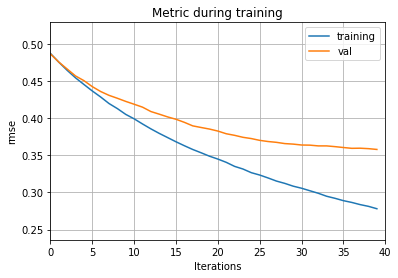

LightGBM Train Accuracy Score : 92.34%
LightGBM Test Accuracy Score : 84.13%


In [58]:
params = {'learning_rate':0.05,
          'n_estimators': 40,
          'metric': ['logloss']}

LGB_40 = lgb.LGBMClassifier(**params)

model_40 = LGB_40.fit(x_train.T, y_train.T, eval_set = [(x_train.T, y_train.T), (x_test.T, y_test.T)], eval_names = ['training', 'val'] ,eval_metric= 'rmse', verbose = False)

lgb.plot_metric(model_40, 'rmse')
plt.show();

#Prediction
y_pred = LGB_40.predict(x_test.T)

y_pred_train = LGB_40.predict(x_train.T)

from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_train.T, y_pred_train.T) * 100
acc_test = accuracy_score(y_test.T, y_pred.T) * 100

accuracies_train['LightGBM'] = acc_train
accuracies_test['LightGBM'] = acc_test

print("LightGBM Train Accuracy Score : {:.2f}%".format(acc_train))
print("LightGBM Test Accuracy Score : {:.2f}%".format(acc_test))

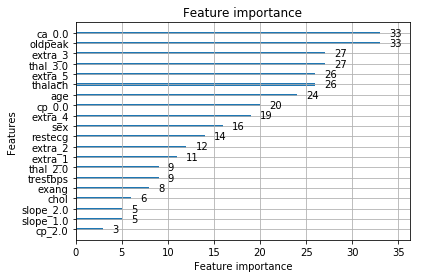

In [59]:
lgb.plot_importance(model_40)
plt.show();

It seems like it does not help significantly.
<br>
Better try more combinations such as mean or something.

## 5.4 : Feature Selection via VarianceThreshold <a class="anchor" id="5.4"></a>

We could also delete some data or features if the variance far from our threshold.

In [60]:
from sklearn.feature_selection import VarianceThreshold


y = df_ori.target.values
x_data = df_ori.drop(['target'], axis = 1)

print('Before threshold, dataset')
print(x_data.shape)

#remove features with variance below the threshold
min_feature_variance = 0.1
feature_selector = VarianceThreshold(threshold = min_feature_variance * (1 - min_feature_variance))
x_data = feature_selector.fit_transform(x_data)

print('After threshold, dataset:')
print(x_data.shape)

# Normalize and split
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test  = x_test.T
y_test  = y_test.T

Before threshold, dataset
(311, 24)
After threshold, dataset:
(311, 19)


Let's check the performance

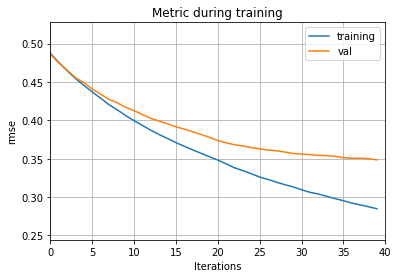

LightGBM Train Accuracy Score : 90.32%
LightGBM Test Accuracy Score : 85.71%


In [61]:
params = {'learning_rate':0.05,
          'n_estimators': 40,
          'metric': ['logloss']}

LGB_40 = lgb.LGBMClassifier(**params)

model_40 = LGB_40.fit(x_train.T, y_train.T, eval_set = [(x_train.T, y_train.T), (x_test.T, y_test.T)], eval_names = ['training', 'val'] ,eval_metric= 'rmse', verbose = False)

lgb.plot_metric(model_40, 'rmse')
plt.show();

#Prediction
y_pred = LGB_40.predict(x_test.T)

y_pred_train = LGB_40.predict(x_train.T)

from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_train.T, y_pred_train.T) * 100
acc_test = accuracy_score(y_test.T, y_pred.T) * 100

accuracies_train['LightGBM'] = acc_train
accuracies_test['LightGBM'] = acc_test

print("LightGBM Train Accuracy Score : {:.2f}%".format(acc_train))
print("LightGBM Test Accuracy Score : {:.2f}%".format(acc_test))

The result is not helping as well.

## 5.5 : Feature Selection via chi2 <a class="anchor" id="5.2"></a>

Let's try chi2 to select the features.

In [62]:

from sklearn.feature_selection import SelectKBest, chi2

y = df_ori.target.values
x_data = df_ori.drop(['target'], axis = 1)

# Normalize and split
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)


print('Before threshold, dataset:')
print(x_train.shape)

# apply ch2
ch2 = SelectKBest(chi2)
x_train = ch2.fit_transform(x_train, y_train)
x_test = ch2.transform(x_test)

print('After threshold, dataset:')
print(x_train.shape)



Before threshold, dataset:
(248, 24)
After threshold, dataset:
(248, 10)


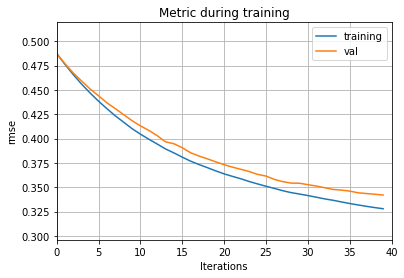

LightGBM Train Accuracy Score : 87.10%
LightGBM Test Accuracy Score : 88.89%


In [63]:
params = {'learning_rate':0.05,
          'n_estimators': 40,
          'metric': ['logloss']}

LGB_40 = lgb.LGBMClassifier(**params)

model_40 = LGB_40.fit(x_train, y_train, eval_set = [(x_train, y_train), (x_test, y_test)], eval_names = ['training', 'val'] ,eval_metric= 'rmse', verbose = False)

lgb.plot_metric(model_40, 'rmse')
plt.show();

#Prediction
y_pred = LGB_40.predict(x_test)

y_pred_train = LGB_40.predict(x_train)

from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_train, y_pred_train) * 100
acc_test = accuracy_score(y_test, y_pred) * 100

accuracies_train['LightGBM'] = acc_train
accuracies_test['LightGBM'] = acc_test

print("LightGBM Train Accuracy Score : {:.2f}%".format(acc_train))
print("LightGBM Test Accuracy Score : {:.2f}%".format(acc_test))

Wow! It works!
<br>
It seems like via chi2, we are able to get a better result because there are less "useless features"!

# 6. Conclusion <a class="anchor" id="6"></a>

We did some popular machine learning model such as regression, random forest... and compare the performance between them.

After we dig into the feature distribution, contribution and try some common feature engineering, we find out that basically the performance is base on the dataset size and quilty.

Although there are numerous way to improve the performance, but I think the key point is about the quilty and size of the dataset features.

References:
<br>
* [What Causes Heart Disease? Explaining the Model](https://www.kaggle.com/tentotheminus9/what-causes-heart-disease-explaining-the-model)
<br>
* [Heart Disease - Classifications (Machine Learning)](https://www.kaggle.com/cdabakoglu/heart-disease-classifications-machine-learning)
<br>
* [Analyzing the Heart Disease](https://www.kaggle.com/kralmachine/analyzing-the-heart-disease)
<br>
* [Cross Validation and Grid Search for Model Selection in Python](https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/)
<br>
* [Cerebellar model articulation controller](https://en.wikipedia.org/wiki/Cerebellar_model_articulation_controller)
